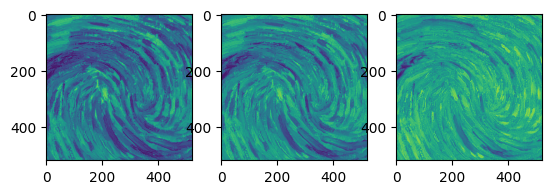

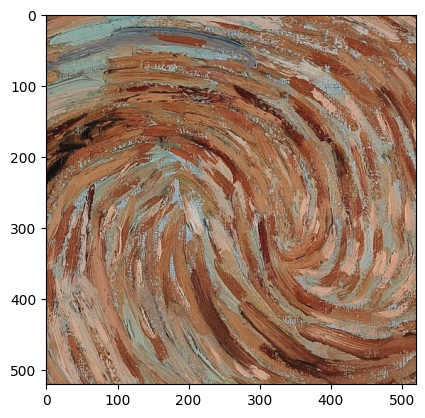

In [151]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

im = cv2.imread("../res/starry_night_crop.jpg")
im_B = im[:,:,0]
im_G = im[:,:,1]
im_R = im[:,:,2]
# im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
plt.subplot(1,3,1)
plt.imshow(im_R)
plt.subplot(1,3,2)
plt.imshow(im_G)
plt.subplot(1,3,3)
plt.imshow(im_B)
plt.show()
plt.imshow(im)

In [152]:
#hyperparameters
size_of_end_filter = 8
im_reduction_factor = 0

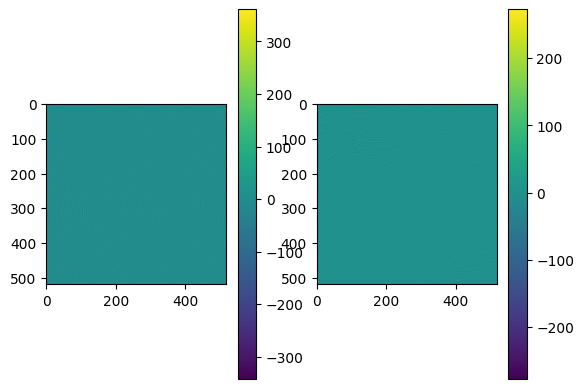

In [153]:
im_blurred = np.copy(im)
im_blurred = np.int16(im_blurred)
# im_blurred = cv2.GaussianBlur(im_blurred, [im_reduction_factor*3+1,im_reduction_factor*3+1], im_reduction_factor)
# im_blurred = cv2.resize(im_blurred,(np.int16(520/im_reduction_factor),np.int16(520/im_reduction_factor)))
im_blurred_x = np.copy(im_blurred)
im_blurred_y = np.copy(im_blurred)
grad_x = cv2.filter2D(im_blurred_x[:,:,0], -1, np.array([[1,-2,1]]))
plt.subplot(1,2,1)
plt.imshow(grad_x)
plt.colorbar()
grad_y = cv2.filter2D(im_blurred_y[:,:,0], -1, np.array([[1],[-2],[1]]))
plt.subplot(1,2,2)
plt.imshow(grad_y)
plt.colorbar()

## To work out what the gradient should be at each pixel

We will apply another uniform mxm filter to each point on the image. Then, simply normalise both and calculate theta.

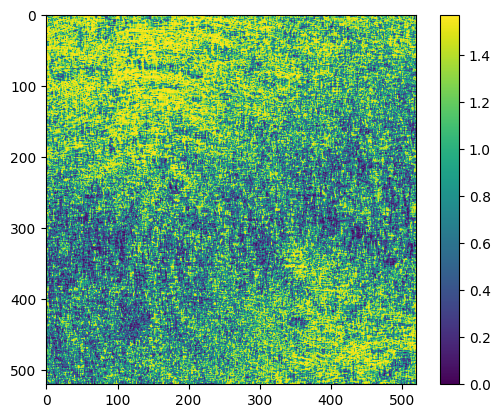

In [154]:
flt = np.float32(np.ones([size_of_end_filter,size_of_end_filter]))/np.sqrt(2)/size_of_end_filter
a = cv2.filter2D(np.float32(grad_x), -1, flt)
b = cv2.filter2D(np.float32(grad_y), -1, flt)
theta = np.pi/2 * np.reciprocal(np.sqrt((a*a+b*b))) * np.abs(b)
plt.imshow(theta)
plt.colorbar()